In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import sys

In [ ]:
os . chdir ( "/content/gdrive/My Drive/Hackathon/WNS_Analytics_Wizard_2018/dataset")

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("train_LZdllcl.csv")
data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


1.   positive skewness in no_of_trainings and length_of_service
2.   null values in education and previous_year_rating


In [ ]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

# **Data Analysis**

Analyzing length of Service

In [ ]:
data['groups_len_of_service'] = pd.cut(data.loc[:,'length_of_service'], bins = 5)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,groups_len_of_service
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,"(0.964, 8.2]"
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,"(0.964, 8.2]"
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,"(0.964, 8.2]"
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,"(8.2, 15.4]"
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,"(0.964, 8.2]"


In [ ]:
prom = data.loc[data['is_promoted'] == 1,]
total_groupwise = data['groups_len_of_service'].value_counts()
promoted_groupwise = prom['groups_len_of_service'].value_counts()

promoted_groupwise = pd.DataFrame(promoted_groupwise).join(pd.DataFrame(total_groupwise), rsuffix = "_total")
promoted_groupwise['percentage'] = 100*promoted_groupwise['count']/promoted_groupwise['count_total']

promoted_groupwise.reset_index(inplace = True)

for key,row in promoted_groupwise.iterrows():
    promoted_groupwise.loc[key,'start'] = row['groups_len_of_service'].left
    promoted_groupwise.loc[key,'end'] = row['groups_len_of_service'].right

promoted_groupwise['groups_len_of_service'] = promoted_groupwise['start'].astype('str') + ' to ' + promoted_groupwise['end'].astype('str')

promoted_groupwise

,groups_len_of_service,count,count_total,percentage,start,end
0,0.964 to 8.2,3788,44100,8.589569,0.964,8.2
1,8.2 to 15.4,718,8361,8.587490,8.200,15.4
2,15.4 to 22.6,144,1968,7.317073,15.400,22.6
3,22.6 to 29.8,15,323,4.643963,22.600,29.8
4,29.8 to 37.0,3,56,5.357143,29.800,37.0


Text(0.5, 1.0, 'Percentage of people promoted vs length of service')

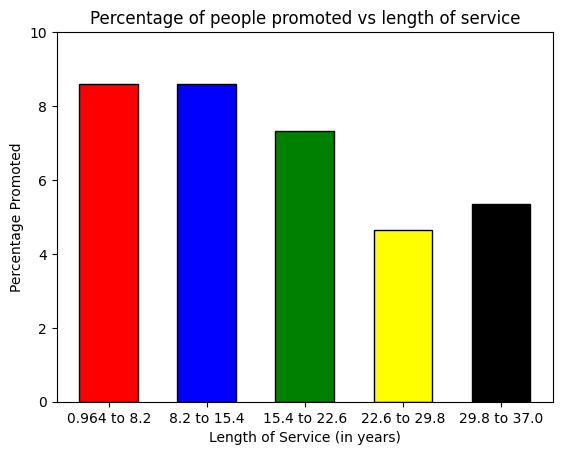

In [ ]:
plt.bar(x = promoted_groupwise['groups_len_of_service'], height = promoted_groupwise['percentage'],
        width = 0.6, color = ['red', 'blue', 'green', 'yellow', 'black'], edgecolor = 'black')

plt.yticks(np.arange(0, 12, step=2))
plt.xlabel("Length of Service (in years)")
plt.ylabel("Percentage Promoted")
plt.title("Percentage of people promoted vs length of service")

Thus people below 15 years of length of service are more likely to get promoted

{'whiskers': [<matplotlib.lines.Line2D at 0x788d1b054e50>,
 'caps': [<matplotlib.lines.Line2D at 0x788d1b055390>,
 'boxes': [<matplotlib.lines.Line2D at 0x788d1b054bb0>,
 'medians': [<matplotlib.lines.Line2D at 0x788d1b0558d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x788d1b055b70>,
 'means': []}

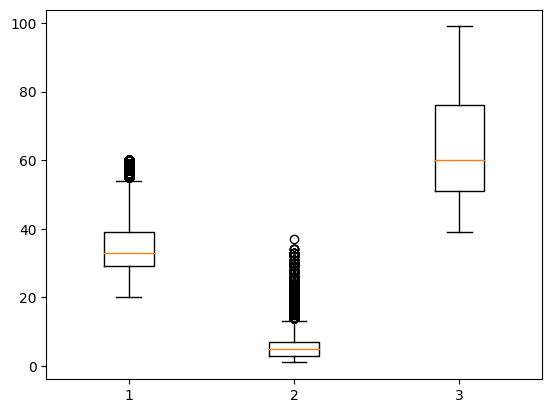

In [ ]:
plt.boxplot(data[['age', 'length_of_service', 'avg_training_score']])

{'whiskers': [<matplotlib.lines.Line2D at 0x788d1b0ae140>,
 'caps': [<matplotlib.lines.Line2D at 0x788d1b0ad270>,
 'boxes': [<matplotlib.lines.Line2D at 0x788d1b0ae3e0>],
 'medians': [<matplotlib.lines.Line2D at 0x788d1b1a5150>],
 'fliers': [<matplotlib.lines.Line2D at 0x788d1b46b3d0>],
 'means': []}

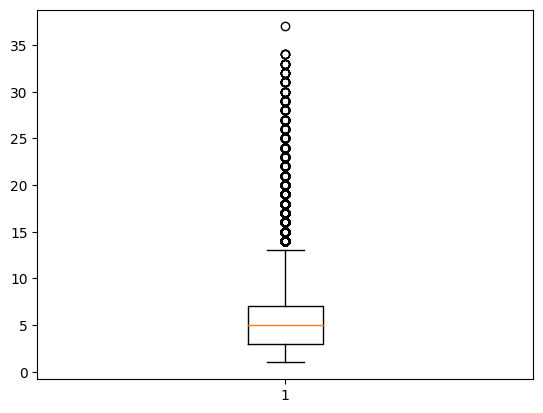

In [ ]:
plt.boxplot(data[['length_of_service']])

In [ ]:
data.loc[data['age'] >= 55]["age"].value_counts()

,count
age,
55,294
56,264
57,238
60,217
58,213
59,209


Distribution of kpi vs promotion

In [ ]:
dep_data = data[['department', 'employee_id']].groupby("department").count()
dep_data.rename(columns = {"employee_id" : "Count_of_emps"}, inplace = True)
dep_data

,Count_of_emps
department,
Analytics,5352
Finance,2536
HR,2418
Legal,1039
Operations,11348
Procurement,7138
R&D,999
Sales & Marketing,16840
Technology,7138


In [ ]:
#data['groups_len_of_service'] = pd.cut(data.loc[:,'length_of_service'], bins = 5)
kpi_data = data.pivot_table(index = ['department', 'groups_len_of_service','KPIs_met >80%', 'is_promoted'],
                            values = 'employee_id',
                            aggfunc = 'count')
kpi_data.reset_index(inplace = True)
kpi_data = kpi_data.set_index("department").join(dep_data).reset_index().rename(columns = {"employee_id" : "count"})
kpi_data

,department,groups_len_of_service,KPIs_met >80%,is_promoted,count,Count_of_emps
0,Analytics,"(0.964, 8.2]",0,0,2608,5352
1,Analytics,"(0.964, 8.2]",0,1,142,5352
2,Analytics,"(0.964, 8.2]",1,0,1653,5352
3,Analytics,"(0.964, 8.2]",1,1,320,5352
4,Analytics,"(8.2, 15.4]",0,0,367,5352
...,...,...,...,...,...,...
175,Technology,"(22.6, 29.8]",1,1,3,7138
176,Technology,"(29.8, 37.0]",0,0,8,7138
177,Technology,"(29.8, 37.0]",0,1,0,7138
178,Technology,"(29.8, 37.0]",1,0,1,7138


In [ ]:
#depts = ['Technology', 'Procurement', 'Analytics']

#sub_data = kpi_data[kpi_data['department'].isin(depts)]
#filtered_df = df[df["City"].str.contains("Los Angeles")]
sub_data = kpi_data
sub_data["percentage"] = sub_data['count']*100/sub_data['Count_of_emps']
sub_data = sub_data.loc[sub_data["is_promoted"] == 1]

for key,row in sub_data.iterrows():
    sub_data.loc[key,'start'] = row['groups_len_of_service'].left
    sub_data.loc[key,'end'] = row['groups_len_of_service'].right

sub_data['groups_len_of_service'] = sub_data['start'].astype('str') + ' to ' + sub_data['end'].astype('str')
sub_data = sub_data[['department', 'groups_len_of_service', 'KPIs_met >80%', 'percentage']]
sub_data

,department,groups_len_of_service,KPIs_met >80%,percentage
1,Analytics,0.964 to 8.2,0,2.653214
3,Analytics,0.964 to 8.2,1,5.979073
5,Analytics,8.2 to 15.4,0,0.261584
7,Analytics,8.2 to 15.4,1,0.541854
9,Analytics,15.4 to 22.6,0,0.018685
...,...,...,...,...
171,Technology,15.4 to 22.6,1,0.252171
173,Technology,22.6 to 29.8,0,0.000000
175,Technology,22.6 to 29.8,1,0.042029
177,Technology,29.8 to 37.0,0,0.000000


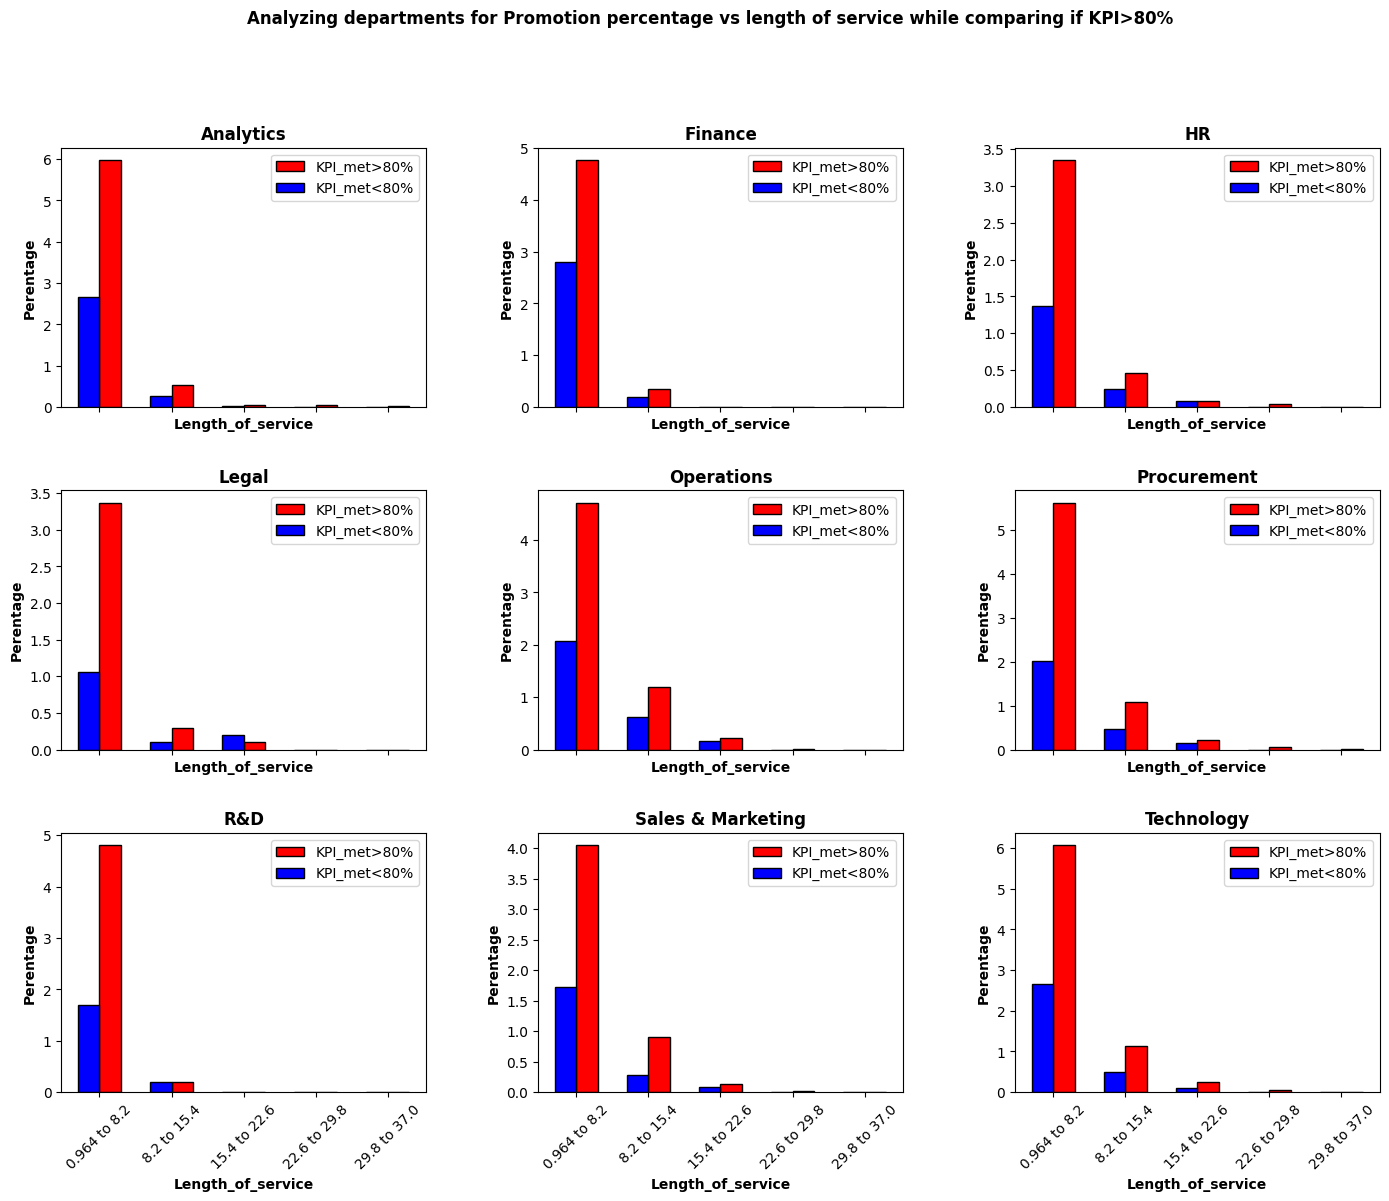

In [ ]:
fig, ax = plt.subplots(3,3,sharex = True, figsize=(15,12))
fig.suptitle('Analyzing departments for Promotion percentage vs length of service while comparing if KPI>80%', fontweight='bold')
fig.tight_layout(pad=5)
# Bar positions
r = np.arange(5)
r1 = r - 0.15
r2 = r + 0.15

# Plotting
for var1 in range(3):
    for var2 in range(3):
        anal_data = sub_data.loc[sub_data["department"] == dep_data.index[var2 + 3*var1]]
        ax[var1][var2].bar(r2, anal_data.loc[anal_data['KPIs_met >80%'] == 1, "percentage"], color='red', width=0.3, edgecolor='black', label='KPI_met>80%')
        ax[var1][var2].bar(r1, anal_data.loc[anal_data['KPIs_met >80%'] == 0, "percentage"], color='blue', width=0.3, edgecolor='black', label='KPI_met<80%')

        # Xticks
        ax[var1][var2].set_xlabel('Length_of_service', fontweight='bold')
        ax[var1][var2].set_xticks(r)
        ax[var1][var2].set_xticklabels(anal_data['groups_len_of_service'].unique(), rotation = 45)
        ax[var1][var2].set_title(dep_data.index[var2 + 3*var1], fontweight='bold')
        ax[var1][var2].legend()
        ax[var1][var2].set_ylabel('Perentage', fontweight='bold')


Observations


1.   In the Legal Department, the people with Kpi<80% who have a length of service between 15.4 yrs and 22.6 yrs have a higher chance of getting promotion
2.   In all the departments, young employees who have a length of service ranging from 1yr to 8.2yrs and have a KPI>80% have a 50 to 75% higher chance of a promotion compared to their corresponding employees with KPI<80%



Analyzing no_of_trainings, avg training score, departments and is promoted

Text(0.5, 1.0, 'Histogram of number of people and how many trainings they completed')

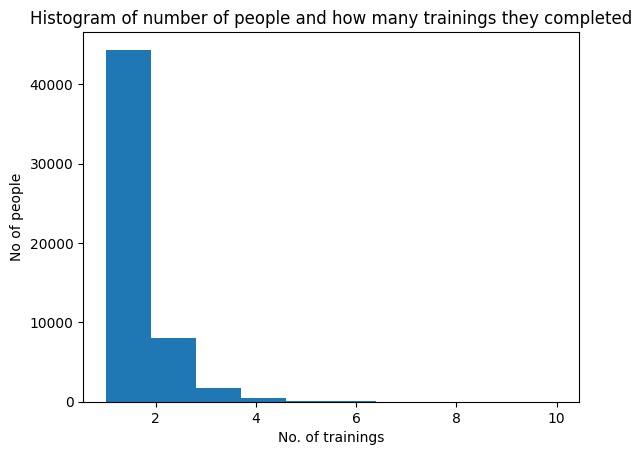

In [ ]:
plt.hist(data['no_of_trainings'])
plt.xlabel("No. of trainings")
plt.ylabel("No of people")
plt.title("Histogram of number of people and how many trainings they completed")

## Analyzing for trainings < 4

Binned Training Score and Number of trainings

In [ ]:
temp_data = data.loc[data['no_of_trainings']<=4]

temp_data['grouped_training_score'] = pd.cut(temp_data.loc[:,'avg_training_score'], bins = 5)
temp_data['grouped_no_of_trainings'] = pd.cut(temp_data.loc[:,'no_of_trainings'], bins = 4)
temp_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,grouped_training_score,grouped_no_of_trainings
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,"(38.94, 51.0]","(0.997, 1.75]"
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,"(51.0, 63.0]","(0.997, 1.75]"
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,"(38.94, 51.0]","(0.997, 1.75]"
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,"(38.94, 51.0]","(1.75, 2.5]"
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,"(63.0, 75.0]","(0.997, 1.75]"


In [ ]:
sub_data = temp_data.pivot_table(index = ['department', 'grouped_training_score', 'grouped_no_of_trainings', 'is_promoted'],
                 values = 'employee_id',
                 aggfunc = 'count').rename(columns = {'employee_id' : "count"}).reset_index()

sub_data = sub_data.loc[sub_data['is_promoted'] == 1]

sub_data = sub_data.set_index("department").join(dep_data)
sub_data['percentage'] = sub_data['count']*100/sub_data['Count_of_emps']
sub_data = sub_data.drop(['is_promoted', 'count', 'Count_of_emps'], axis=1)
sub_data.reset_index(inplace = True)

for key,row in sub_data.iterrows():
    sub_data.loc[key,'start_ts'] = row['grouped_training_score'].left
    sub_data.loc[key,'end_ts'] = row['grouped_training_score'].right
    sub_data.loc[key,'start_nt'] = row['grouped_no_of_trainings'].left
    sub_data.loc[key,'end_nt'] = row['grouped_no_of_trainings'].right

sub_data['grouped_training_score'] = sub_data['start_ts'].astype('str') + ' to ' + sub_data['end_ts'].astype('str')
sub_data['grouped_no_of_trainings'] = sub_data['start_nt'].astype('str') + ' to ' + sub_data['end_nt'].astype('str')

sub_data.drop(["start_ts", "end_ts", "start_nt", "end_nt"], axis = 1, inplace = True)
sub_data.head(20)
#sub_data = pd.DataFrame(sub_data.unstack())
#sub_data.loc[sub_data['grouped_no_of_trainings'] == '7.0 to 10.0']

,department,grouped_training_score,grouped_no_of_trainings,percentage
0,Analytics,38.94 to 51.0,0.997 to 1.75,0.000000
1,Analytics,38.94 to 51.0,1.75 to 2.5,0.000000
2,Analytics,38.94 to 51.0,2.5 to 3.25,0.000000
3,Analytics,38.94 to 51.0,3.25 to 4.0,0.000000
4,Analytics,51.0 to 63.0,0.997 to 1.75,0.000000
5,Analytics,51.0 to 63.0,1.75 to 2.5,0.000000
6,Analytics,51.0 to 63.0,2.5 to 3.25,0.000000
7,Analytics,51.0 to 63.0,3.25 to 4.0,0.000000
8,Analytics,63.0 to 75.0,0.997 to 1.75,0.000000
9,Analytics,63.0 to 75.0,1.75 to 2.5,0.000000


In [ ]:
sub_data['grouped_no_of_trainings'].unique()

array(['0.997 to 1.75', '1.75 to 2.5', '2.5 to 3.25', '3.25 to 4.0'],
      dtype=object)

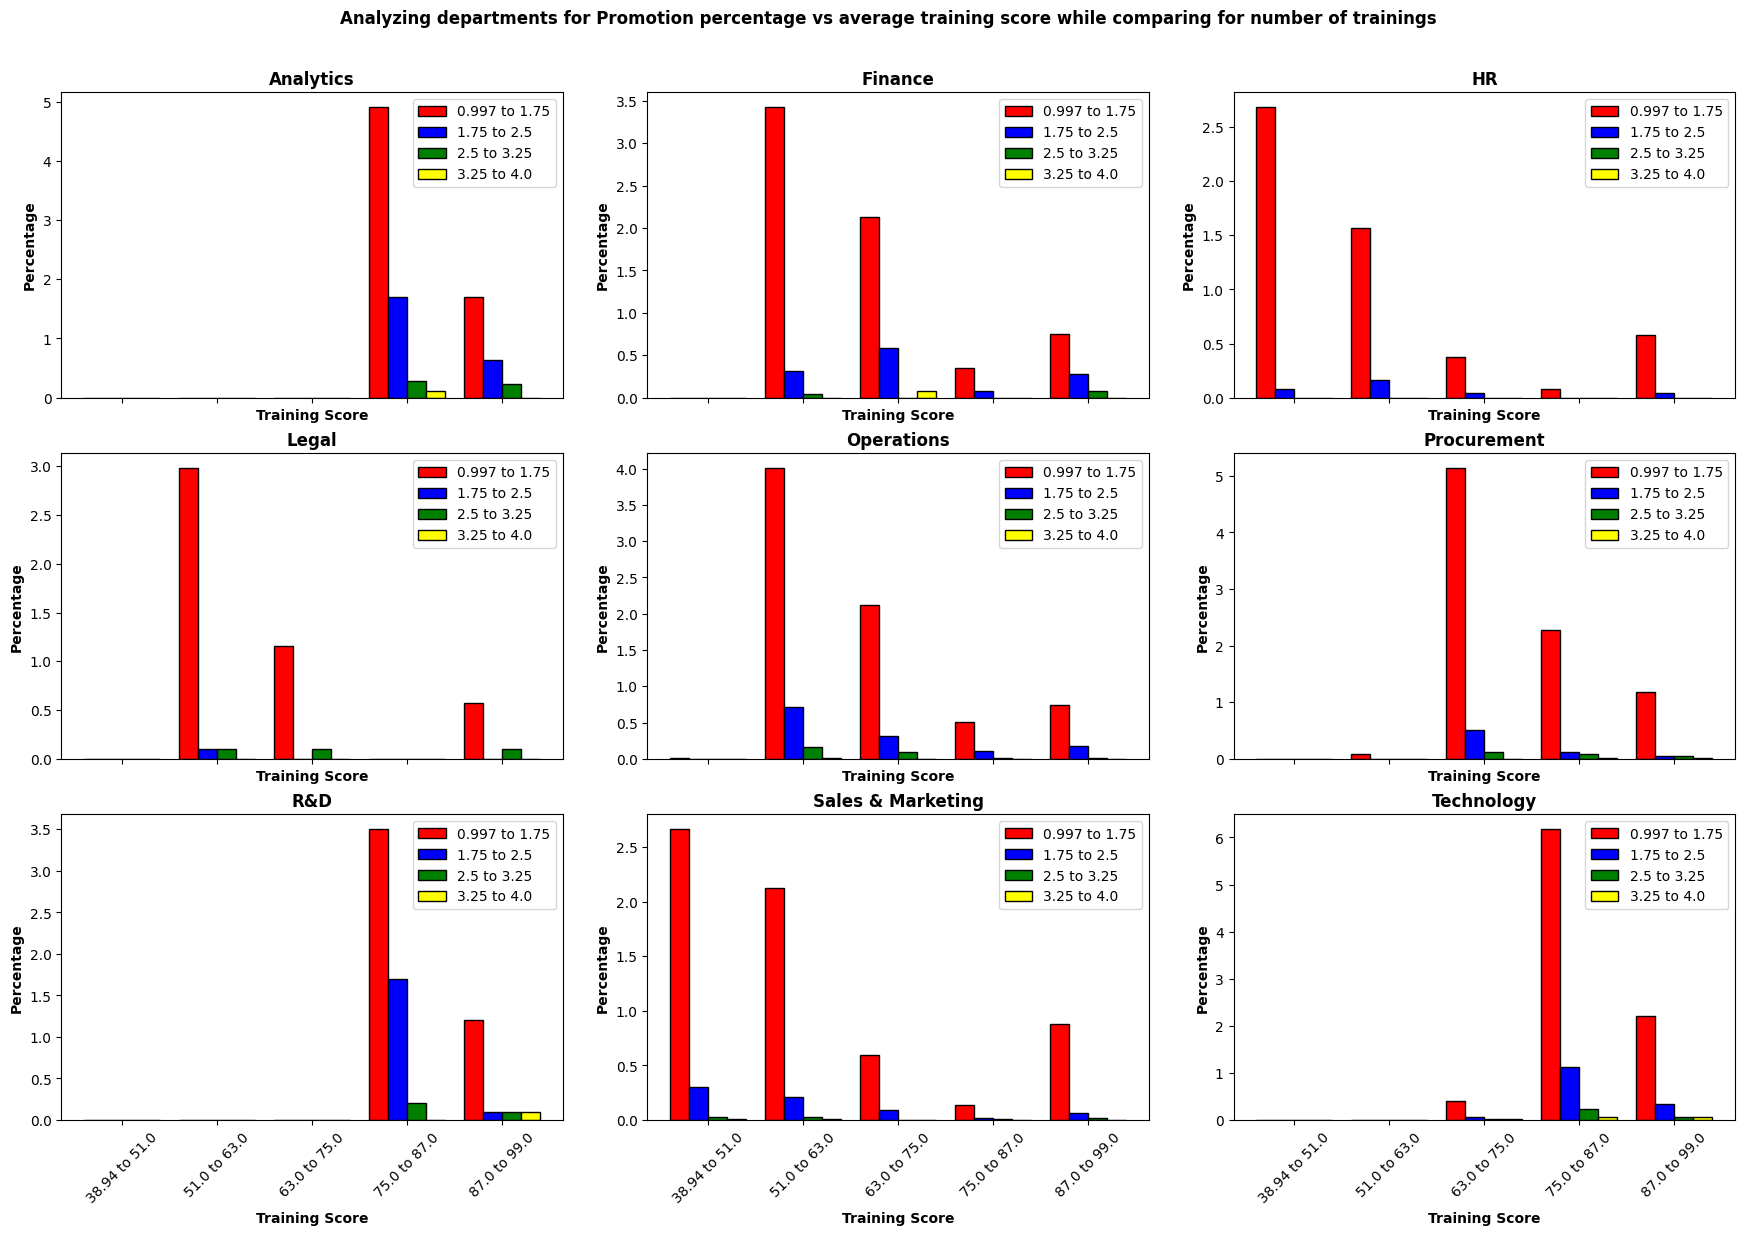

In [ ]:
fig, ax = plt.subplots(3,3, sharex = True, figsize=(18,12))
fig.suptitle('Analyzing departments for Promotion percentage vs average training score while comparing for number of trainings', fontweight='bold')
fig.tight_layout(pad=3)
# Bar positions
r = np.arange(5)
r1 = r - 0.3
r2 = r - 0.1
r3 = r + 0.1
r4 = r + 0.3

# Plotting
for var1 in range(3):
    for var2 in range(3):
        anal_data = sub_data.loc[sub_data["department"] == dep_data.index[var2 + 3*var1]]

        ax[var1][var2].bar(r1, anal_data.loc[anal_data['grouped_no_of_trainings'] == '0.997 to 1.75', "percentage"], color='red', width=0.2, edgecolor='black', label='0.997 to 1.75')
        ax[var1][var2].bar(r2, anal_data.loc[anal_data['grouped_no_of_trainings'] == '1.75 to 2.5', "percentage"], color='blue', width=0.2, edgecolor='black', label='1.75 to 2.5')
        ax[var1][var2].bar(r3, anal_data.loc[anal_data['grouped_no_of_trainings'] == '2.5 to 3.25', "percentage"], color='green', width=0.2, edgecolor='black', label='2.5 to 3.25')
        ax[var1][var2].bar(r4, anal_data.loc[anal_data['grouped_no_of_trainings'] == '3.25 to 4.0', "percentage"], color='yellow', width=0.2, edgecolor='black', label='3.25 to 4.0')

        # Xticks
        ax[var1][var2].set_xlabel('Training Score', fontweight='bold')
        ax[var1][var2].set_xticks(r)
        ax[var1][var2].set_xticklabels(anal_data['grouped_training_score'].unique(), rotation = 45)
        ax[var1][var2].set_title(dep_data.index[var2 + 3*var1], fontweight='bold')
        ax[var1][var2].legend()
        ax[var1][var2].set_ylabel('Percentage', fontweight='bold')


Observations:


1.   It is much easier to get a promotion in Sales and Marketing and HR department even if you have a low average training score. It is much harder to get promotion in R&D, Analytics and Technology with lower Training score




In [ ]:
sub_data = data.loc[data['no_of_trainings']<=5].pivot_table(index = ['department', 'no_of_trainings', 'is_promoted'],
                            values = 'employee_id',
                            aggfunc = 'count').reset_index().rename(columns = {"employee_id" : "count"})

sub_data

,department,no_of_trainings,is_promoted,count
0,Analytics,1,0,3482
1,Analytics,1,1,354
2,Analytics,2,0,1131
3,Analytics,2,1,125
4,Analytics,3,0,201
...,...,...,...,...
71,Technology,3,0,211
72,Technology,3,1,22
73,Technology,4,0,66
74,Technology,4,1,10


In [ ]:
sub_data2 = data[["department", "no_of_trainings", "is_promoted"]].groupby(by = ['department', 'no_of_trainings']).count()

merged_data = sub_data.set_index(["department", "no_of_trainings"]).join(sub_data2, rsuffix = "_total")
merged_data['percentage'] = merged_data['count']/merged_data['is_promoted_total']*100
merged_data = merged_data.reset_index()

merged_data.head(15)

,department,no_of_trainings,is_promoted,count,is_promoted_total,percentage
0,Analytics,1,0,3482,3836,90.771637
1,Analytics,1,1,354,3836,9.228363
2,Analytics,2,0,1131,1256,90.047771
3,Analytics,2,1,125,1256,9.952229
4,Analytics,3,0,201,228,88.157895
5,Analytics,3,1,27,228,11.842105
6,Analytics,4,0,26,32,81.250000
7,Analytics,4,1,6,32,18.750000
8,Finance,1,0,1766,1935,91.266150
9,Finance,1,1,169,1935,8.733850


In [ ]:
dic = {"department" : [],
       "no_of_trainings" : [],
       "is_promoted" : [],
       "percentage" : []}

for i in dep_data.index:
    for j in range(1,6):
        for k in range(2):
            if len(merged_data.loc[(merged_data['department'] == i) & (merged_data["no_of_trainings"] == j) & (merged_data["is_promoted"] == k)]) == 0:
                dic["department"].append(i)
                dic["no_of_trainings"].append(j)
                dic["is_promoted"].append(k)
                dic["percentage"].append(0)
print(dic)
merged_data = pd.concat([merged_data, pd.DataFrame(dic)], ignore_index = True)
merged_data.sort_values(by = ['department', 'no_of_trainings', 'is_promoted'], ascending = [True, True, True], inplace = True)
merged_data

{'department': ['Analytics', 'Analytics', 'Finance', 'HR', 'HR', 'HR', 'HR', 'HR', 'Legal', 'Legal', 'Legal', 'Legal', 'R&D', 'Technology'], 'no_of_trainings': [5, 5, 5, 3, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5], 'is_promoted': [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], 'percentage': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


,department,no_of_trainings,is_promoted,count,is_promoted_total,percentage
0,Analytics,1,0,3482.0,3836.0,90.771637
1,Analytics,1,1,354.0,3836.0,9.228363
2,Analytics,2,0,1131.0,1256.0,90.047771
3,Analytics,2,1,125.0,1256.0,9.952229
4,Analytics,3,0,201.0,228.0,88.157895
...,...,...,...,...,...,...
72,Technology,3,1,22.0,233.0,9.442060
73,Technology,4,0,66.0,76.0,86.842105
74,Technology,4,1,10.0,76.0,13.157895
75,Technology,5,0,14.0,14.0,100.000000


In [ ]:
merged_data.loc[(merged_data['department'] == 'Operations') & (merged_data['no_of_trainings'] == 5)]

,department,no_of_trainings,is_promoted,count,is_promoted_total,percentage
36,Operations,5,0,1.0,2.0,50.0
37,Operations,5,1,1.0,2.0,50.0


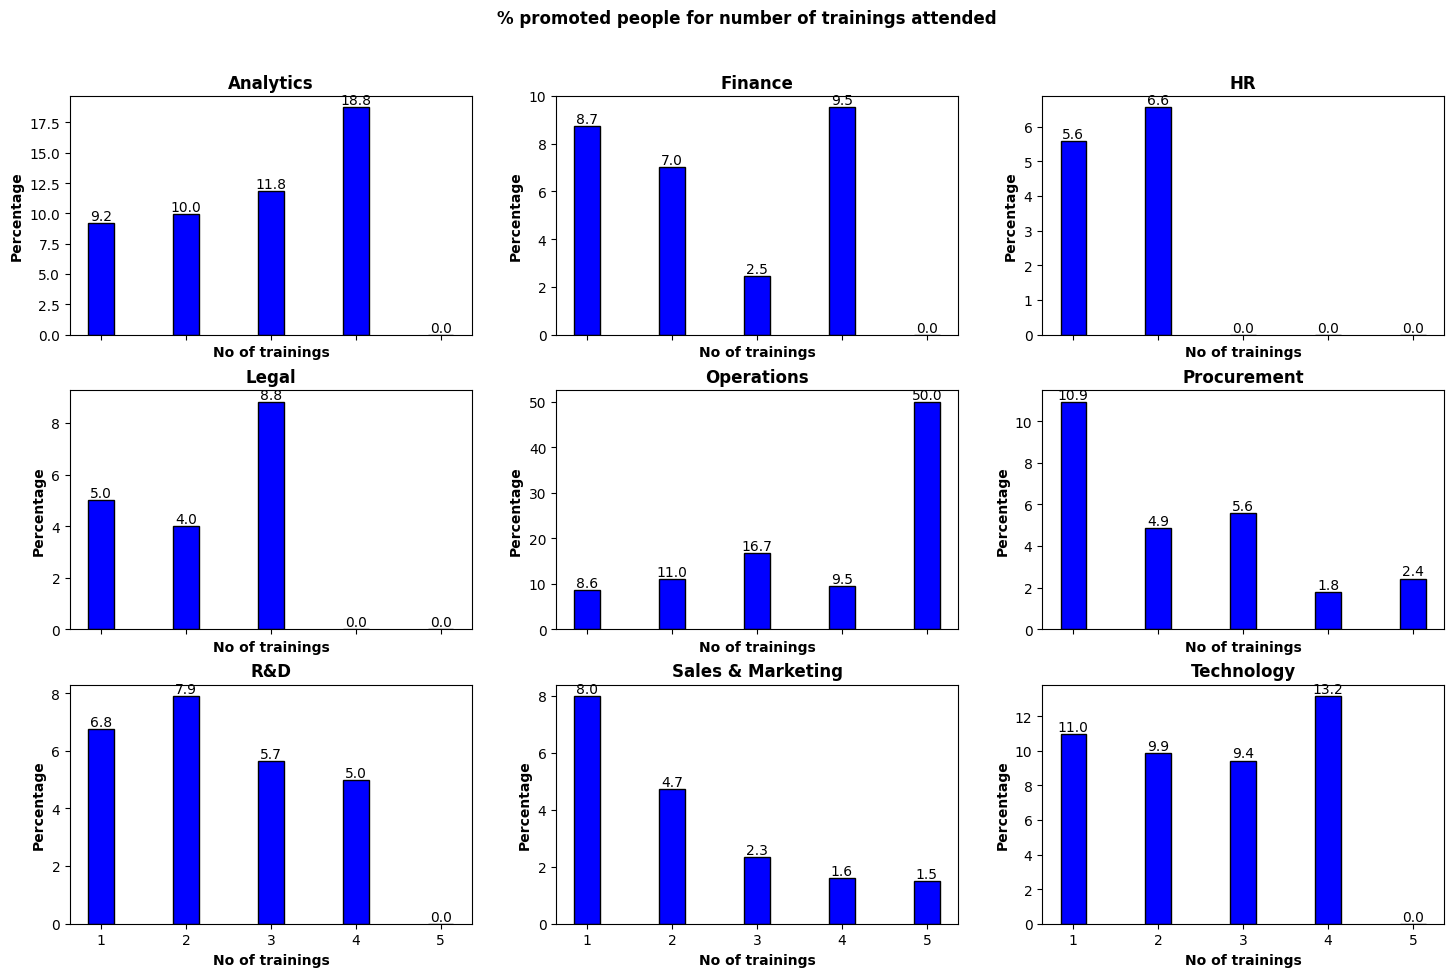

In [ ]:

fig, ax = plt.subplots(3,3, sharex = True, figsize=(15,10))
fig.suptitle('% promoted people for number of trainings attended', fontweight='bold')
fig.tight_layout(pad=3)
# Bar positions
r = np.arange(5)
#r1 = r - 0.15
#r2 = r + 0.15

for var1 in range(3):
    for var2 in range(3):
        anal_data = merged_data.loc[merged_data["department"] == dep_data.index[var2 + 3*var1]]
        #print(anal_data.head())
        #bars1 = ax[var1][var2].bar(r1, anal_data.loc[anal_data['is_promoted'] == 0, "percentage"], color='red', width=0.3, edgecolor='black', label='not promoted')
        #ax[var1][var2].bar_label(bars1, label = anal_data.loc[anal_data['is_promoted'] == 0, "percentage"], fmt='%.1f')
        #for rect in range(5):
        #    height = ax[var1][var2][rect].get_height()/2
        #    plt.text(ax[var1][var2][rect].get_x() + ax[var1][var2][rect].get_width()/ 2.0, height, anal_data.loc[anal_data['is_promoted'] == 0, "count"], ha='center', va='bottom')

        bars2 = ax[var1][var2].bar(r, anal_data.loc[anal_data['is_promoted'] == 1, "percentage"], color='blue', width=0.3, edgecolor='black', label='promoted')
        ax[var1][var2].bar_label(bars2, label = anal_data.loc[anal_data['is_promoted'] == 1, "count"], fmt='%.1f')
        # Xticks
        ax[var1][var2].set_xlabel('No of trainings', fontweight='bold')
        ax[var1][var2].set_xticks(r)
        ax[var1][var2].set_xticklabels(anal_data['no_of_trainings'].unique())
        ax[var1][var2].set_title(dep_data.index[var2 + 3*var1], fontweight='bold')
        ax[var1][var2].legend().remove()
        ax[var1][var2].set_ylabel('Percentage', fontweight='bold')



In [ ]:
temp_data

In [ ]:
temp_data = data.loc[data['no_of_trainings']>4]

temp_data['grouped_training_score'] = pd.cut(temp_data.loc[:,'avg_training_score'], bins = 5)

sub_data = temp_data.pivot_table(index = ['department', 'grouped_training_score', 'is_promoted'],
                 values = 'employee_id',
                 aggfunc = 'count').rename(columns = {'employee_id' : "count"}).reset_index()

print(sub_data.head(10))
sub_data = sub_data.set_index("department").join(dep_data)
sub_data['percentage'] = sub_data['count']*100/sub_data['Count_of_emps']
sub_data = sub_data.drop(['count', 'Count_of_emps'], axis=1)
sub_data.reset_index(inplace = True)

print(sub_data.head())
for key,row in sub_data.iterrows():
    sub_data.loc[key,'start_ts'] = row['grouped_training_score'].left
    sub_data.loc[key,'end_ts'] = row['grouped_training_score'].right

sub_data['grouped_training_score'] = sub_data['start_ts'].astype('str') + ' to ' + sub_data['end_ts'].astype('str')

sub_data.drop(["start_ts", "end_ts"], axis = 1, inplace = True)
sub_data
#sub_data = pd.DataFrame(sub_data.unstack())


  department grouped_training_score  is_promoted  count
0    Finance         (42.953, 52.4]            0      0
1    Finance         (42.953, 52.4]            1      0
2    Finance           (52.4, 61.8]            0      0
3    Finance           (52.4, 61.8]            1      0
4    Finance           (61.8, 71.2]            0      2
5    Finance           (61.8, 71.2]            1      0
6    Finance           (71.2, 80.6]            0      0
7    Finance           (71.2, 80.6]            1      0
8    Finance           (80.6, 90.0]            0      0
9    Finance           (80.6, 90.0]            1      0
  department grouped_training_score  is_promoted  percentage
0    Finance         (42.953, 52.4]            0    0.000000
1    Finance         (42.953, 52.4]            1    0.000000
2    Finance           (52.4, 61.8]            0    0.000000
3    Finance           (52.4, 61.8]            1    0.000000
4    Finance           (61.8, 71.2]            0    0.078864


,department,grouped_training_score,is_promoted,percentage
0,Finance,42.953 to 52.4,0,0.000000
1,Finance,42.953 to 52.4,1,0.000000
2,Finance,52.4 to 61.8,0,0.000000
3,Finance,52.4 to 61.8,1,0.000000
4,Finance,61.8 to 71.2,0,0.078864
5,Finance,61.8 to 71.2,1,0.000000
6,Finance,71.2 to 80.6,0,0.000000
7,Finance,71.2 to 80.6,1,0.000000
8,Finance,80.6 to 90.0,0,0.000000
9,Finance,80.6 to 90.0,1,0.000000


In [ ]:
temp_data['department'].unique()


array(['Technology', 'Sales & Marketing', 'Procurement', 'R&D', 'Finance',
       'Operations'], dtype=object)

IndexError: index 6 is out of bounds for axis 0 with size 6

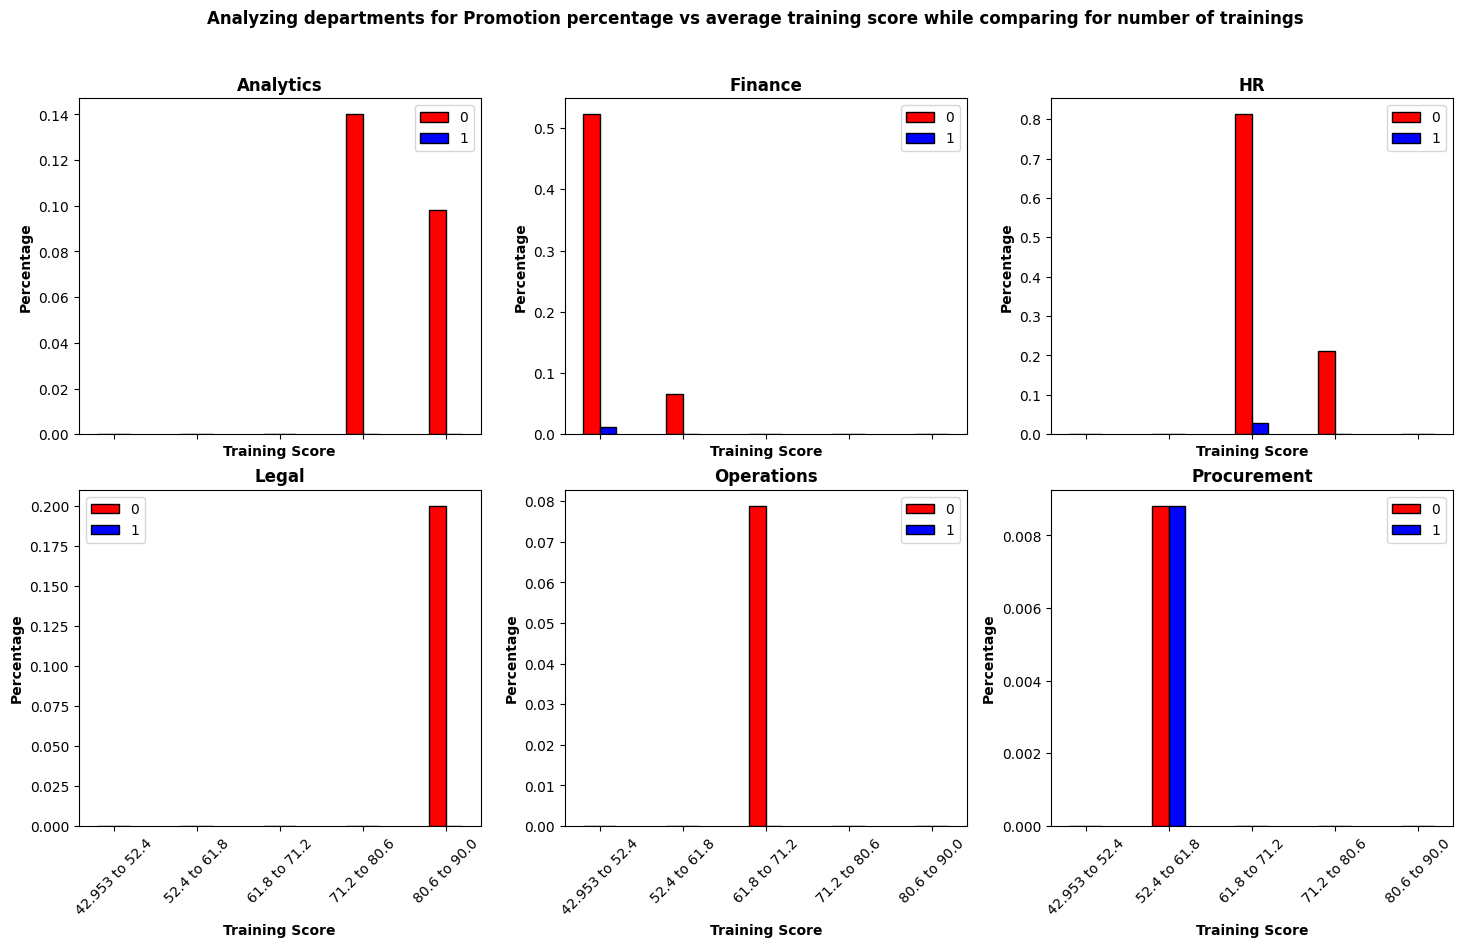

In [ ]:
fig, ax = plt.subplots(2,3, sharex = True, figsize=(15,9))
fig.suptitle('Analyzing departments for Promotion percentage vs average training score while comparing for number of trainings', fontweight='bold')
fig.tight_layout(pad=3)
# Bar positions
r = np.arange(5)
r1 = r - 0.1
r2 = r + 0.1

# Plotting
for var1 in range(3):
    for var2 in range(3):
        anal_data = sub_data.loc[sub_data["department"] == temp_data['department'].unique()[var2 + 3*var1]]
        ax[var1][var2].bar(r1, anal_data.loc[anal_data['is_promoted'] == 0, "percentage"], color='red', width=0.2, edgecolor='black', label='0')
        ax[var1][var2].bar(r2, anal_data.loc[anal_data['is_promoted'] == 1, "percentage"], color='blue', width=0.2, edgecolor='black', label='1')
        # Xticks
        ax[var1][var2].set_xlabel('Training Score', fontweight='bold')
        ax[var1][var2].set_xticks(r)
        ax[var1][var2].set_xticklabels(anal_data['grouped_training_score'].unique(), rotation = 45)
        ax[var1][var2].set_title(dep_data.index[var2 + 3*var1], fontweight='bold')
        ax[var1][var2].legend()
        ax[var1][var2].set_ylabel('Percentage', fontweight='bold')

In [ ]:
#scatter plot between length of service and no of trainings
#bin at 2 years of service and correlate with no of trainings
#pie chrt for binned data

In [ ]:
sns.countplot(x = 'length_of_service', data = data, palette = 'RdBu_r', stat = "count")

### Department wise distribition of how many people got promotion and how many didn't

<Axes: xlabel='is_promoted', ylabel='percent'>

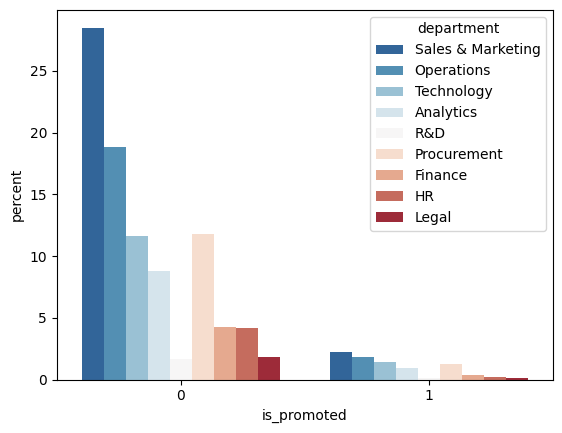

In [ ]:
sns.countplot(x = 'is_promoted', hue = 'department',
              data = data, palette = 'RdBu_r',
              stat = "percent")

This means that about 28% of the population who were in Sales and Marketing department did not get promotion

# Department wise Promotion percentage

<Axes: xlabel='percent', ylabel='department'>

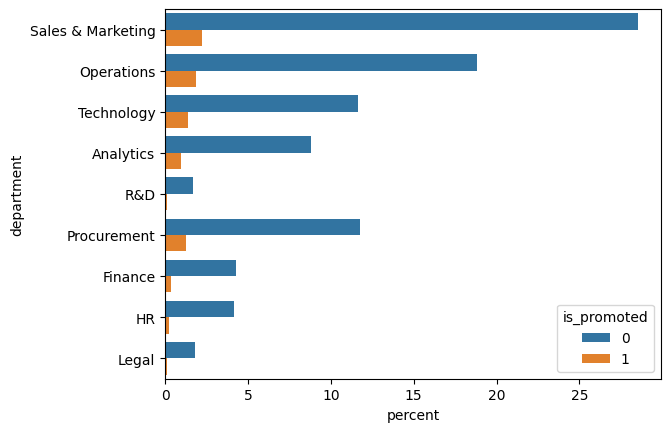

In [ ]:
sns.countplot(y = 'department', hue = 'is_promoted',
              data = data, stat = "percent",
              orient = "h")

Inference:
Thus, we can conclude that a very small minority of the dataset got a promotion if they were a part of the Legal or RnD team

**Department wise distribution**

How many people were there in each department

In [ ]:
dep_data = data.pivot_table(index=['department'],
                         values=['employee_id'],
                        aggfunc='count')
dep_data.rename(columns = {"employee_id" : "total"}, inplace = True)
dep_data.reset_index(inplace = True)
dep_data

,department,total
0,Analytics,5352
1,Finance,2536
2,HR,2418
3,Legal,1039
4,Operations,11348
5,Procurement,7138
6,R&D,999
7,Sales & Marketing,16840
8,Technology,7138


How many people got promoted in each department

In [ ]:
promote_data = data.pivot_table(index = ['department', 'is_promoted'],
                                values = 'employee_id',
                                aggfunc = 'count')

#promote_data['dep'] = promote_data.index
promote_data.reset_index(inplace = True)
promote_data.rename(columns = {"employee_id" : "count"}, inplace = True)
promote_data

,department,is_promoted,count
0,Analytics,0,4840
1,Analytics,1,512
2,Finance,0,2330
3,Finance,1,206
4,HR,0,2282
5,HR,1,136
6,Legal,0,986
7,Legal,1,53
8,Operations,0,10325
9,Operations,1,1023


In [ ]:
merged_data = promote_data.set_index('department').join(dep_data.set_index('department'))
merged_data.reset_index(inplace = True)
merged_data['percentage'] = 100 * merged_data['count']/merged_data['total']
merged_data

,department,is_promoted,count,total,percentage
0,Analytics,0,4840,5352,90.433483
1,Analytics,1,512,5352,9.566517
2,Finance,0,2330,2536,91.876972
3,Finance,1,206,2536,8.123028
4,HR,0,2282,2418,94.375517
5,HR,1,136,2418,5.624483
6,Legal,0,986,1039,94.898941
7,Legal,1,53,1039,5.101059
8,Operations,0,10325,11348,90.985196
9,Operations,1,1023,11348,9.014804


In [ ]:
plot_data = merged_data.loc[merged_data['is_promoted'] == 1]
plot_data.sort_values(by = ['percentage'], inplace = True)

Text(0, 0.5, 'Percentage')

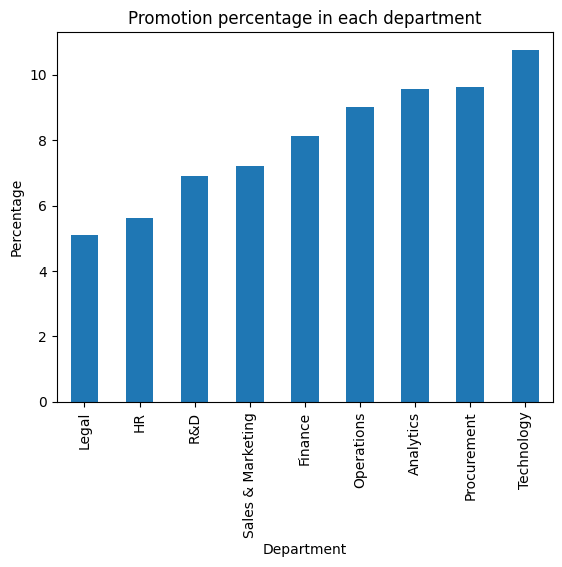

In [ ]:
plot_data.plot(x = 'department', y = "percentage", kind = "bar")

plt.legend().remove()
plt.title("Promotion percentage in each department")
plt.xlabel("Department")
plt.ylabel("Percentage")

In [ ]:
dep_data = data.pivot_table(index=['region'],
                         values=['employee_id'],
                        aggfunc='count')
dep_data.rename(columns = {"employee_id" : "total"}, inplace = True)
dep_data.reset_index(inplace = True)
dep_data

,region,total
0,region_1,610
1,region_10,648
2,region_11,1315
3,region_12,500
4,region_13,2648
5,region_14,827
6,region_15,2808
7,region_16,1465
8,region_17,796
9,region_18,31


In [ ]:
promote_data = data.pivot_table(index = ['region', 'is_promoted'],
                                values = 'employee_id',
                                aggfunc = 'count')

#promote_data['dep'] = promote_data.index
promote_data.reset_index(inplace = True)
promote_data.rename(columns = {"employee_id" : "count"}, inplace = True)
promote_data

,region,is_promoted,count
0,region_1,0,552
1,region_1,1,58
2,region_10,0,597
3,region_10,1,51
4,region_11,0,1241
...,...,...,...
63,region_7,1,516
64,region_8,0,602
65,region_8,1,53
66,region_9,0,412


In [ ]:
merged_data = promote_data.set_index('region').join(dep_data.set_index('region'))
merged_data.reset_index(inplace = True)
merged_data['percentage'] = 100 * merged_data['count']/merged_data['total']
merged_data

KeyError: "None of ['region'] are in the columns"

In [ ]:
plot_data = merged_data.loc[merged_data['is_promoted'] == 1]
plot_data.sort_values(by = ['percentage'], inplace = True)

In [ ]:
plot_data.plot(x = 'region', y = "percentage", kind = "bar")

plt.legend().remove()
plt.title("Promotion percentage in each region")
plt.xlabel("region")
plt.ylabel("Percentage")

**Thus, if an employee was in Legal department, they had a 5% chance of promotion vs someone is in the Technology department had a much higher chance of promotion around 10%**

In [ ]:
#Filling Null Values for X
data.loc[data.education.isnull(), "education"] = "X"

# Finding relation between education department and probability of promotion

In [ ]:
edu_data = data.pivot_table(index = ["department", "is_promoted","education"],
                            values = "employee_id",
                            aggfunc = 'count')

edu_data.reset_index(inplace = True)
edu_data.set_index(["department", "is_promoted"], inplace = True)
edu_data.rename(columns = {"employee_id" : "count_edu"}, inplace = True)
edu_data

education  count_edu
department is_promoted                             
Analytics  0                  Bachelor's       3605
           0            Master's & above        924
           0                           X        311
           1                  Bachelor's        373
           1            Master's & above        113
...                                  ...        ...
Technology 0                           X         91
           1                  Bachelor's        497
           1             Below Secondary         31
           1            Master's & above        232
           1                           X          8

[64 rows x 2 columns]

In [ ]:
#modified_promote_data = promote_data.set_index(['department', 'is_promoted'])
#promote_data.set_index(['department'])
#modified_promote_data.rename(columns = {"count" : "total_count"}, inplace = True)
modified_promote_data = promote_data.set_index('department').join(dep_data.set_index('department'))
modified_promote_data.reset_index(inplace = True)
modified_promote_data.set_index(['department', "is_promoted"], inplace = True)

plot_data = modified_promote_data.join(edu_data)
plot_data.drop(["count"], axis = 1, inplace = True)
plot_data['Percentage'] = 100*plot_data['count_edu']/plot_data['total']
plot_data.reset_index(inplace = True)
plot_data = plot_data.loc[plot_data['is_promoted'] == 1]
plot_data.sort_values(by = ['total'], inplace = True)
plot_data


KeyError: "None of ['department'] are in the columns"

In [ ]:
#Converting pibot table to normal data frame
small_data = plot_data[["department", 'education', "Percentage"]]
small_data.set_index(['department', 'education'], inplace = True)
#small_data = pd.DataFrame(small_data.to_records())
small_data = pd.DataFrame(small_data.unstack())
small_data.reset_index(inplace = True)
small_data.set_index(['department'], inplace = True)

df = pd.DataFrame(small_data.columns.tolist())
small_data.columns = df[1].tolist()
small_data

# **What is the distribution of educational qualification department wise who got promoted**

In [ ]:
small_data.sort_values(by = (["Bachelor's",'Below Secondary',"Master's & above",'X']), inplace = True)
small_data.plot(kind = "bar")

In [ ]:
modified_promote_data = promote_data.set_index('department').join(dep_data.set_index('department'))
modified_promote_data.reset_index(inplace = True)
modified_promote_data.set_index(['department', "is_promoted"], inplace = True)

plot_data = modified_promote_data.join(edu_data)
plot_data.drop(["count"], axis = 1, inplace = True)
plot_data['Percentage'] = 100*plot_data['count_edu']/plot_data['total']
plot_data.reset_index(inplace = True)
plot_data = plot_data.loc[plot_data['is_promoted'] == 0]
plot_data.sort_values(by = ['total'], inplace = True)
plot_data

KeyError: "None of ['department'] are in the columns"

In [ ]:
#Converting pibot table to normal data frame
small_data = plot_data[["department", 'education', "Percentage"]]
small_data.set_index(['department', 'education'], inplace = True)
#small_data = pd.DataFrame(small_data.to_records())
small_data = pd.DataFrame(small_data.unstack())
small_data.reset_index(inplace = True)
small_data.set_index(['department'], inplace = True)

df = pd.DataFrame(small_data.columns.tolist())
small_data.columns = df[1].tolist()
small_data

In [ ]:
small_data.sort_values(by = (["Bachelor's",'Below Secondary',"Master's & above",'X']), inplace = True)
small_data.plot(kind = "bar", stacked = True)

In [ ]:
#box plot of numerical values
#degree distribution of promotions


### **Studying relation between department, education and promotion probability**

In [ ]:
temp_data = data.pivot_table(index=['department', 'education', 'is_promoted'],
                         values=['employee_id'],
                        aggfunc='count')

temp_data

employee_id
department education        is_promoted             
Analytics  Bachelor's       0                   3605
                            1                    373
           Master's & above 0                    924
                            1                    113
           X                0                    311
...                                              ...
Technology Below Secondary  1                     31
           Master's & above 0                   1964
                            1                    232
           X                0                     91
                            1                      8

[64 rows x 1 columns]

In [ ]:
temp_data.describe()

,employee_id
count,64.000000
mean,856.375000
std,1781.805162
min,1.000000
25%,31.000000
50%,153.500000
75%,655.000000
max,10305.000000


### **Analyzing Sales and marketing department**

In [ ]:
sales_data = data.loc[data.loc[:,'department'] == 'Sales & Marketing']
promoted_data = sales_data.loc[sales_data['is_promoted'] == 1]

In [ ]:
promoted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1213 entries, 11 to 54796
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           1213 non-null   int64  
 1   department            1213 non-null   object 
 2   region                1213 non-null   object 
 3   education             1213 non-null   object 
 4   gender                1213 non-null   object 
 5   recruitment_channel   1213 non-null   object 
 6   no_of_trainings       1213 non-null   int64  
 7   age                   1213 non-null   int64  
 8   previous_year_rating  1116 non-null   float64
 9   length_of_service     1213 non-null   int64  
 10  KPIs_met >80%         1213 non-null   int64  
 11  awards_won?           1213 non-null   int64  
 12  avg_training_score    1213 non-null   int64  
 13  is_promoted           1213 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 142.1+ KB


In [ ]:
promoted_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,1213.000000,1213.000000,1213.000000,1116.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.0
mean,39073.606760,1.133553,34.489695,3.877240,5.670239,0.708986,0.117065,59.932399,1.0
std,23217.790969,0.424463,7.211396,1.015654,3.962083,0.454417,0.321630,15.224515,0.0
min,47.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,41.000000,1.0
25%,18646.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,49.000000,1.0
50%,39517.000000,1.000000,33.000000,4.000000,5.000000,1.000000,0.000000,53.000000,1.0
75%,59933.000000,1.000000,38.000000,5.000000,8.000000,1.000000,0.000000,64.000000,1.0
max,78288.000000,6.000000,60.000000,5.000000,32.000000,1.000000,1.000000,99.000000,1.0


### null_value treatment for education and previous year rating

Distribution of degree for those with null values

In [ ]:
 promoted_data.pivot_table(index=['department', 'gender'],
                         values=['age'],
                        aggfunc='count')

age
department        gender      
Sales & Marketing f        176
                  m       1037

In [ ]:
promoted_data.loc[promoted_data['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [ ]:
promoted_data.loc[promoted_data['previous_year_rating'].isnull(),'previous_year_rating'] = 4


# **Feature Engineering**

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
#Previous year rating and promotion chance
